In [5]:
import numpy as np
import matplotlib.pyplot as plt

def diffusion_2d_explicit(u0, t_final, k=0.05, Lx=1.0, Ly=1.0, dt=None, nx=200, ny=200, bc='dirichlet'):
    dx = Lx / nx
    dy = Ly / ny
    if dt is None:
        dt = 0.25 * 1.0 / (2*k*(1/dx**2 + 1/dy**2))  # conservador
    nu_x = k*dt/dx**2
    nu_y = k*dt/dy**2
    if nu_x + nu_y > 0.5:
        print("WARNING: scheme unstable potential: nu_x+nu_y =", nu_x + nu_y)

    u = u0.copy()
    nt = int(np.ceil(t_final / dt))
    for n in range(nt):
        un = u.copy()
        u[1:-1,1:-1] = un[1:-1,1:-1] + \
            nu_x*(un[1:-1,2:] - 2*un[1:-1,1:-1] + un[1:-1,:-2]) + \
            nu_y*(un[2:,1:-1] - 2*un[1:-1,1:-1] + un[:-2,1:-1])

        if bc == 'periodic':
            u[0,:] = u[-2,:]
            u[-1,:] = u[1,:]
            u[:,0] = u[:,-2]
            u[:,-1] = u[:,1]
        elif bc == 'dirichlet':
            u[0,:] = 0; u[-1,:] = 0; u[:,0] = 0; u[:,-1] = 0
    return u

def exacta(X, Y, time, amplitudes, k=0.05):
    f = np.zeros((100,100))
    for j in range(1, 4):
            f += amplitudes[j - 1] * np.exp(-((j * np.pi)**2 + (j * np.pi)**2) * k * time) * np.sin(j * np.pi * X) * np.sin(j * np.pi * Y)
    return f

############################################

def plot_solution(amplitudes, time):
    nx = ny = 100
    x = np.linspace(0, 1, nx, endpoint=False)
    y = np.linspace(0, 1, ny, endpoint=False)
    X, Y = np.meshgrid(x, y)
    
    # condición inicial
    u0 = np.zeros((nx, ny))
    for j in range(1, 4):
        u0 += amplitudes[j - 1] * np.sin(j * np.pi * X) * np.sin(j * np.pi * Y)
    
    u_fdm = diffusion_2d_explicit(u0, t_final=time, nx=nx, ny=ny, bc='dirichlet')
    u_exact = exacta(X, Y, time, amplitudes)
    error = np.abs(u_exact - u_fdm)
    
    # plt.figure(figsize=(6,5))
    # plt.imshow(u_fdm, extent=[0,1,0,1], origin='lower')
    # plt.title('Difusión 2D t final')
    # plt.colorbar()
    # plt.show()
    
    fig = plt.figure(figsize=(18, 5))
    plt.suptitle(f"Solución y error para t={time:.2f}", fontsize=16)
    
    data = {
        "Solución DF": u_fdm,
        "Solución Exacta": u_exact,
        "Error |DF − Exacta|": error,
    }
    
    for idx, (title, field) in enumerate(data.items()):
        ax = plt.subplot(1, 3, idx + 1)
        ax.set_title(title)
        ax.set_xlabel("x")
        ax.set_ylabel("y")
    
        im = ax.imshow(
            field,
            origin="lower",
            extent=[0, 1, 0, 1],
            aspect="auto",
        )
        fig.colorbar(im, ax=ax)

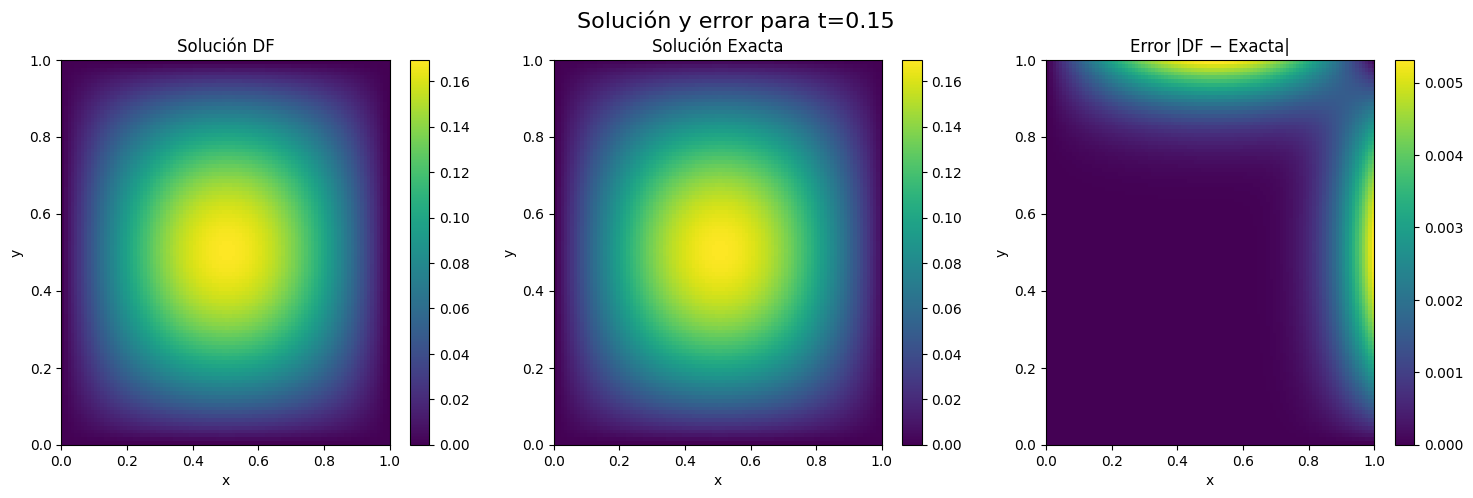

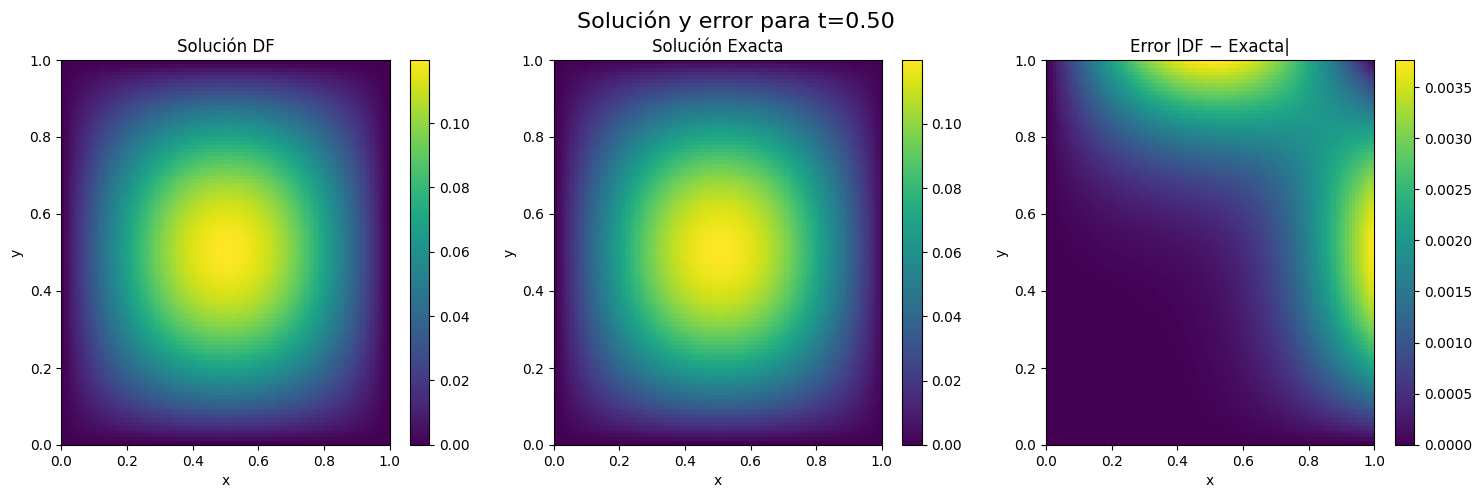

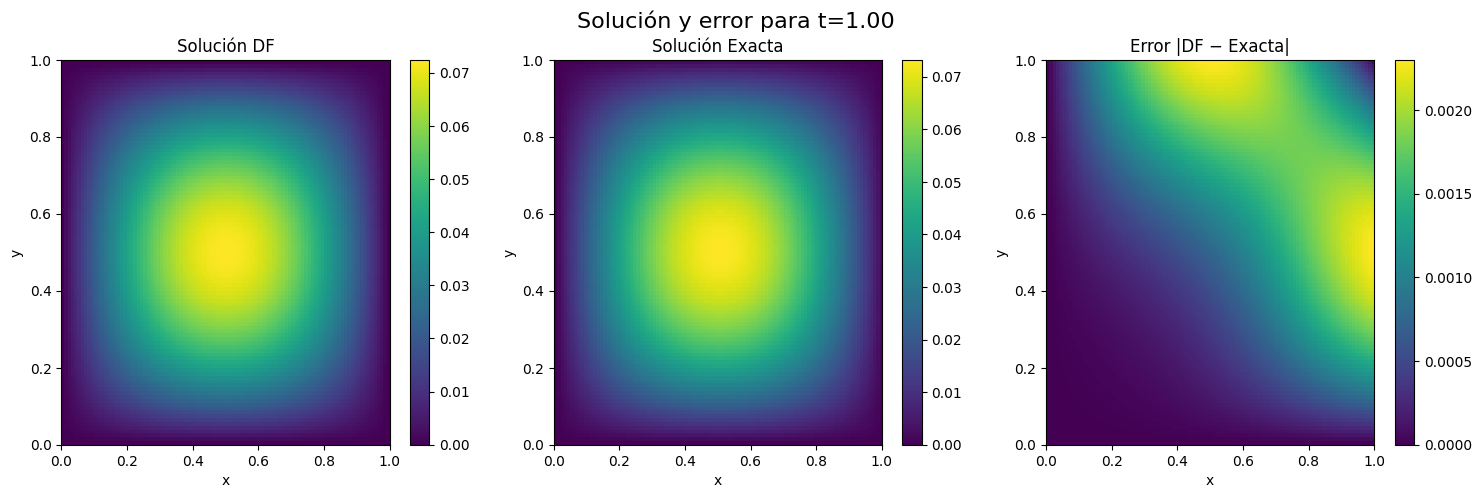

In [6]:
# k = 0.05
# entrenamiento
amplitudes = [0.19644403457641602, 0.0008303772192448378, 0.00021751194435637444]
# test
# amplitudes = [0.39787769317626953, 0.20745158195495605, 0.08426874876022339]

plot_solution(amplitudes, time=0.15)
plot_solution(amplitudes, time=0.5)
plot_solution(amplitudes, time=1.0)